<a href="https://colab.research.google.com/github/ZhangYizhe/PythonForDataAnalysis/blob/main/First_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

So I want to test how to use Colaboratory to help me more easily to complete the task.

In [2]:
import requests
import pandas as pd

In [4]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [3]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2021-03-15 05:34:35.544466')

In [5]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [6]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [7]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-03-15 06:00:00,59789.86,59910.54,58990.08,58999.73,188.521957,1.119190e+07
2021-03-15 07:00:00,59000.00,59352.76,58375.01,58738.16,372.990139,2.197705e+07
2021-03-15 08:00:00,58738.16,58773.57,57319.31,57809.35,553.290203,3.205559e+07
2021-03-15 09:00:00,57809.35,58379.40,57520.58,57734.43,384.791243,2.231921e+07
2021-03-15 10:00:00,57734.43,58043.00,54555.00,55867.56,1396.290769,7.856427e+07


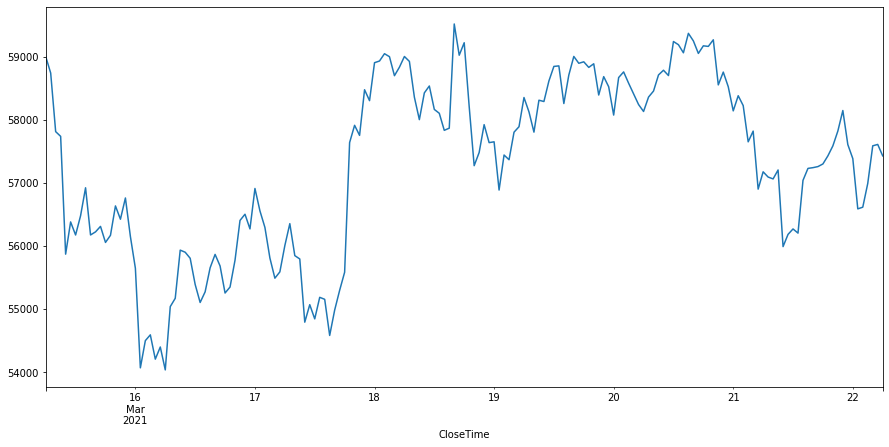

In [8]:
btc['ClosePrice'].plot(figsize=(15, 7))